In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.5.3'

In [ ]:
# 피클 파일 불러오기

ratings = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data/ml-latest-small/ratings_updated.p')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
44,1001,1866,2.5,1999-12-20 06:10:08
45,1001,2405,3.0,2003-03-05 16:19:57
46,1001,1343,3.0,1997-03-19 12:00:45
47,1001,1875,4.0,2003-03-31 02:13:13


## RMSE

In [ ]:
# Step1. 리스트 생성

rating_example = [[4, 3.5], [5, 5], [0.5, 1], [3, 5]]
rating_example = pd.DataFrame(rating_example, columns=['Actual', 'Predict'])
rating_example

,Actual,Predict
0,4.0,3.5
1,5.0,5.0
2,0.5,1.0
3,3.0,5.0


In [ ]:
# Step2. error 계산
# error = Actual - Predict

rating_example['error'] = rating_example['Actual'] - rating_example['Predict']

* 전체 퍼포먼스 측정
  * `rating_example.sum()`: 총 합으로 하면 음수&양수 값이 상쇄되어버림
  * `squared error`: +와 -가 캔슬되는 것을 막기 위하여 **2 제곱을 사용함

In [ ]:
rating_example['squared error'] = rating_example['error'] ** 2  # 제곱하여 양수값으로 통일
rating_example

,Actual,Predict,error,squared error
0,4.0,3.5,0.5,0.25
1,5.0,5.0,0.0,0.00
2,0.5,1.0,-0.5,0.25
3,3.0,5.0,-2.0,4.00


* `mse`(평균 제곱 오차): mean squared error
  * `mean_squared_error(actual, predict)`
  * 예측값과 실제값 간의 차이를 제곱한 후, 평균을 계산한 값

In [ ]:
# Step3. mse(평균 제곱 오차)

mse = rating_example['squared error'].mean()
mse

1.125

* `numpy`: 파이썬의 과학 및 수학 연산을 위한 라이브러리. 다차원 배열과 이를 다루는 다양한 함수를 제공.

In [ ]:
# Step6. numpy 임포트

import numpy as np

* `rmse`(평균 제곱근 오차): root mean squared error
  * MSE의 제곱근으로, 예측값과 실제값 간의 차이의 평균적인 크기
* 해석
  * 예측값이 실제값보다 평균적으로 1점 정도 틀린다.

In [ ]:
# Step5. rmse(평균 제곱근 오차)

rmse = np.sqrt(mse)
rmse

1.0606601717798212

### RMSE sklearn


*   https://scikit-learn.org/stable/



* `Scikit-Learn` 파이썬의 머신러닝 라이브러리. 기계 학습 모델을 구축하고 평가.
  * `.metrics`: 모델의 성능을 측정하는 메트릭 함수 모듈. 회귀 문제, 분류 문제 등 (패키지 용량이 커서 모듈만 골라서 사용)
  * `mean_squared_error`: 회귀 모델의 성능 평가 메트릭.
* `numpy`: 파이썬의 과학 및 수학 연산을 위한 라이브러리. 다차원 배열과 이를 다루는 다양한 함수를 제공.

* 추가설명
  * 회귀 모델은 연속적인 값을 예측하는 문제를 다룬다.

In [ ]:
# Step1. Scikit-Learn & numpy 임포트

from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Step2. MSE & RMSE 계산

mse = mean_squared_error(rating_example['Actual'], rating_example['Predict'])
rmse = np.sqrt(mse)
rmse

1.0606601717798212

## Train Test Split

* `Scikit-Learn`의 모듈만 사용
* `model_selection`: 모델 선택 및 평가하는 모듈
* `train_test_split`: 데이터를 학습과 테스트로 나누는 함수
    * 이 함수는 기본적으로 데이터를 무작위로 섞은 후 지정한 비율에 따라 학습 데이터와 테스트 데이터로 나눔

In [ ]:
# Step1. train_test_split 함수 임포트

from sklearn.model_selection import train_test_split

* `train_test_split`
  * `ratings`: 분할할 데이터셋
  * `random_state=33`: 난수 생성기의 시드(seed)
    * 시드를 고정하면 동일한 난수를 생성하여 항상 같은 데이터 분할
  * `test_size=0.1`: 테스트 세트의 비율
    * 테스트 세트 10%, 훈련 세트 90%

In [ ]:
# Step1. train_test_split

train, test = train_test_split(ratings, random_state=33, test_size=0.1)
print(train.shape)
print(test.shape)

(90796, 4)
(10089, 4)


## 가장 간단한 예측하기

In [ ]:
test.sample()

,userId,movieId,rating,timestamp
93968,599,4980,2.5,2018-02-20 10:31:45


In [ ]:
test.shape

(10089, 4)



*   모두 0.5점으로 예측하기
  * 클래스를 판단하기 어려운 경우나 회귀 문제에서 모델이 평균적인 값을 예측하는 경우에 활용
  * test 데이터의 길이와 동일한 리스트를 생성
  * 리스트의 모든 요소를 0.5로 초기화


In [ ]:
# Step1. 변수 생성

predictions = [0.5] * len(test)

* `from sklearn.metrics import mean_squared_error`: 설명생략
* `import numpy as np`: 설명생략

In [ ]:
# Step2. MSE & RMSE

mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

3.161039336952504

* `%matplotlib inline`
  * IPython 환경에서 Jupyter 노트북 등에서 사용되는 매직 명령어(Magic Command) 중 하나
  * Matplotlib을 사용한 그래프를 출력할 때

In [ ]:
# 매직 명령어
%matplotlib inline

<Axes: >

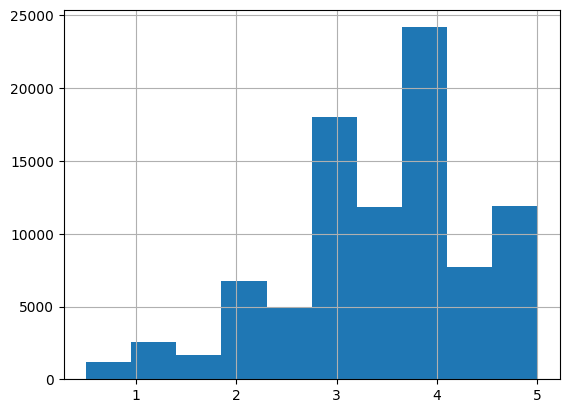

In [ ]:
train['rating'].hist()

---
---
* 문제 1. 모두 5점으로 예측하기


In [ ]:
# Step1. 변수 생성

predictions = [5] * len(test)

AttributeError: ignored

* 패키지 & 모듈
  * `from sklearn.metrics import mean_squared_error`: 설명생략
  * `import numpy as np`: 설명생략

In [ ]:
# Step2. MSE & RMSE

mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

1.8378691221357708

---
* 문제 2. 데이터의 평균으로 예측하기

  * 주의점: train 데이터의 평균으로 test 데이터의 평균을 예측해야 합니다.

In [ ]:
# Step1. train 데이터의 mean 값

rating_avg = train['rating'].mean()
rating_avg

3.503254548658531


* `[rating_avg] * len(test)`
  * rating_avg라는 값으로 이루어진 리스트를 test 데이터셋의 길이만큼 생성
  * 이는 mean 값을 예측값으로 사용하는 것

In [ ]:
# Step2. 예측값(mean)으로 리스트 생성

predictions = [rating_avg] * len(test)

In [ ]:
# Step2. MSE & RMSE

mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

1.0405161351802228

---
* 문제 3. 사용자 평점 기반 예측하기

  * 각 사용자의 평균 평점으로(train), 영화에 대한 평점을 예측(test)하세요.

  * 예시: userId 1번의 train 데이터 평균 평점이 4.33이라면, test 데이터에 있는 userId 1번의 모든 영화에 대한 평점을 4.33이라고 예측한다.

  * train에 해당 사용자에 대한 평점 기록이 전혀 없다면, 어떻게 해야 할까요?

  * 이 예측 방법은 어떤 가정을 가지고 있나요? 예측의 근거를 찾아 보세요.

In [ ]:
# Step1. userId 기준 테이블 생성

users = train.groupby('userId')['rating'].mean().reset_index()
users = users.rename(columns={'rating':'predict'})
users[:3]

,userId,predict
0,1,4.339806
1,2,3.923077
2,3,2.545455


In [ ]:
# Step2. test & users 테이블에 병합

predict_by_users = test.merge(users, how='left', on='userId')
predict_by_users.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
predict      0
dtype: int64

In [ ]:
predict_by_users.sample()

,userId,movieId,rating,timestamp,predict
7868,68,58299,3.0,2009-04-18 22:20:50,3.244681


In [ ]:
# Step3. MSE & RMSE
mse = mean_squared_error(predict_by_users['rating'], predict_by_users['predict'])
rmse = np.sqrt(mse)
rmse

0.9500686501607044

예측의 근거
* 전체 std는 1.04이고, 유저별 std 평균은 0.92이다.
* if 유저별 std가 0.9라는 것은 어떤 영화를 보든지간에 0.9점 위아래 정도로만 점수 차이를 준다는 것

In [ ]:
# 전체로 표준편차
train['rating'].std()

1.0426992060227904

In [ ]:
# userId 기준 표준편차의 평균
train.groupby('userId')['rating'].std().mean()

0.9235820881831974

* 해석
  * 유저들의 표준편차가 1.04보다는 작은 편이다.
  * 따라서 전체의 평균보다는 유저의 평균을 보는것이 나을 수 있다.

<Axes: >

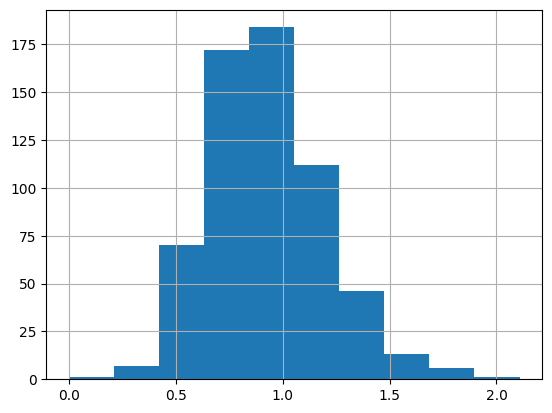

In [ ]:
# userId 별 std 분포 hist
train.groupby('userId')['rating'].std().hist()

---
* 문제 4. 영화 평점 기반 예측하기

  * 각 영화의 평균 평점으로(train), 영화에 대한 평점을 예측(test)하세요.

  * 예시: movieId 1번의 train 데이터 평균 평점이 4.5라면, test 데이터에 있는 movieId 1번 영화에 대한 모든 사용자의 평점을 4.5라고 예측한다.

  * train에 해당 영화에 대한 평점 기록이 전혀 없다면, 어떻게 해야 할까요?

  * 이 예측 방법은 어떤 가정을 가지고 있나요? 예측의 근거를 찾아 보세요.

In [ ]:
# Step1. movieId 기준 평균

movies = train.groupby('movieId')['rating'].mean().reset_index()
movies = movies.rename(columns={'rating':'predict'})
movies[:3]

,movieId,predict
0,1,3.908854
1,2,3.408654
2,3,3.358696


* 해석
  * movieId 176371번의 predict는 4.0점
  * '이 영화는 누구나 좋아하는 영화일 것이다.'

In [ ]:
# Step2. test & movies 테이블 병합

predict_by_movies = test.merge(movies, how='left', on='movieId')
predict_by_movies.head()

,userId,movieId,rating,timestamp,predict
0,370,253,3.5,2006-09-25 05:41:54,3.409091
1,73,68358,5.0,2016-05-26 15:07:04,3.810000
2,600,4643,2.0,2009-03-22 22:39:14,2.760417
3,515,176371,5.0,2017-12-18 13:00:51,4.000000
4,414,1678,3.0,2000-06-20 16:07:32,3.555556


* predict 컬럼에서 364개 null값 발견

In [ ]:
# Step3. 병합 후 null 값 확인

predict_by_movies.isnull().sum()

userId         0
movieId        0
rating         0
timestamp      0
predict      364
dtype: int64

* null 값 확인
  * True / False 확인
    * `predict_by_movies['predict'].isnull()`
  * True 만 확인
    * `predict_by_movies[predict_by_movies['predict'].isnull()]`

In [ ]:
# NaN (Not a Number)
predict_by_movies[predict_by_movies['predict'].isnull()]

,userId,movieId,rating,timestamp,predict
17,474,1496,4.0,2004-06-21 15:40:18,NaN
43,125,94931,3.5,2016-09-23 00:52:23,NaN
48,363,176579,1.0,2017-08-13 00:33:24,NaN
87,553,43684,4.5,2008-08-24 06:41:56,NaN
95,464,90384,2.0,2012-01-03 11:42:32,NaN
...,...,...,...,...,...
9986,477,72224,3.5,2011-02-05 07:34:21,NaN
9994,338,190207,1.5,2018-06-28 01:14:41,NaN
10002,448,168456,2.0,2017-03-12 16:53:23,NaN
10026,534,72308,4.0,2016-04-04 16:39:56,NaN


* null 값에 대한 처치
  * 전체 데이터의 평균으로 대체
<br/>
* Pandas location 사용
  * `df.loc[index(filtering), columns]`


In [ ]:
# Step3. null 값 처리

predict_by_movies.loc[predict_by_movies['predict'].isnull(), 'predict'] = train['rating'].mean()

In [ ]:
# null 값 재확인
predict_by_movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
predict      0
dtype: int64

* 패키지 & 모듈
  * `from sklearn.metrics import mean_squared_error`: 설명생략
  * `import numpy as np`: 설명생략
<br/>
* 해석
  * RMSE: movieId 기준 0.970 > userId 기준 0.923
  * 영화기준 RMSE가 조금 더 높게 나온 이유는 무엇일까?

In [ ]:
# Step4. MSE & RMSE

mse = mean_squared_error(predict_by_movies['rating'], predict_by_movies['predict'])
rmse = np.sqrt(mse)
rmse

0.9705195448037012